**2022-04-25 `18-Unsupervised-Learning - Introduction to Unsupervised Machine Learning`**

Hey everyone! `model, fit, predict....model, fit, predict....` We have learned that with a few lines of code you can train and evaluate models that predict and classify data values.  Today we are going to dive into another major category of ML, `Unsupervised Learning`.  Here are a few resources to prep you for the lessons.
  
* [Supervised vs Unsupervised](https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d)
* [Data Prep](https://towardsdatascience.com/how-to-prepare-your-data-for-your-machine-learning-model-b4c9fd4e7ea)
* [K-means article](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

**Objectives**
* Understand how unsupervised learning compares to supervised learning.
* Prepare and process data for unsupervised learning.
* Apply K-means clustering.
* Use the elbow curve to determine optimal cluster number.

**Presentation**
* [18-Unsupervised-Learning - Introduction to Unsupervised Machine Learning](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/ucb-virt-data-pt-10-2021-u-b/-/blob/master/03-Lesson-Plans/18-Unsupervised-Learning/Slideshows/Data-M_18.1-Unsupervised-Learning.pdf)

| Supervised Learning                | Unsupervised Learning                      |
| ---------------------------------- | ------------------------------------------ |
| Input data are labeled              | Input data are unlabeled                    |
| Uses training datasets             | Uses just input datasets                   |
| **Goal:** Predict a class or value | **Goal:** Determine patterns or group data |

# ==========================================

### 1.01 Instructor Do: Data Preprocessing (0:10)

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Import PCA from sci-kit learn
from sklearn.decomposition import PCA
import hvplot.pandas

In [11]:
df = pd.read_csv('01-Ins_Preprocessing/Resources/chicago_marathon_2018.csv')
df.head()

place_overall  place_gender  bib                          name division  \
0              1             1    1               Farah, Mo (GBR)    35-39   
1              2             2    2  Bayih, Mosinet Geremew (ETH)    25-29   
2              3             3    3           Osako, Suguru (JPN)    25-29   
3              4             4    4       Kipkemoi, Kenneth (KEN)    30-34   
4              5             5    5             Rupp, Galen (USA)    30-34   

      half   finish  
0  1:03:06  2:05:11  
1  1:03:04  2:05:24  
2  1:03:04  2:05:50  
3  1:03:04  2:05:57  
4  1:03:04  2:06:21

In [12]:
df['country'] = df['name'].str.extract('\((.{3})\)')
df.head()

place_overall  place_gender  bib                          name division  \
0              1             1    1               Farah, Mo (GBR)    35-39   
1              2             2    2  Bayih, Mosinet Geremew (ETH)    25-29   
2              3             3    3           Osako, Suguru (JPN)    25-29   
3              4             4    4       Kipkemoi, Kenneth (KEN)    30-34   
4              5             5    5             Rupp, Galen (USA)    30-34   

      half   finish country  
0  1:03:06  2:05:11     GBR  
1  1:03:04  2:05:24     ETH  
2  1:03:04  2:05:50     JPN  
3  1:03:04  2:05:57     KEN  
4  1:03:04  2:06:21     USA

In [13]:
df['country'].value_counts()

USA    13874
MEX     1229
GBR      914
CHN      815
CAN      730
       ...  
BDI        1
AND        1
SEN        1
MLT        1
IRI        1
Name: country, Length: 111, dtype: int64

In [14]:
df['country'] = df['country'].apply(lambda x: x if x in ('USA', 'MEX', 'GBR', 'CHN', 'CAN') else 'Other')

In [15]:
df[['half','finish']] = df[['half','finish']].apply(pd.to_timedelta).apply(lambda x: x.dt.total_seconds())

In [16]:
df.head()

place_overall  place_gender  bib                          name division  \
0              1             1    1               Farah, Mo (GBR)    35-39   
1              2             2    2  Bayih, Mosinet Geremew (ETH)    25-29   
2              3             3    3           Osako, Suguru (JPN)    25-29   
3              4             4    4       Kipkemoi, Kenneth (KEN)    30-34   
4              5             5    5             Rupp, Galen (USA)    30-34   

     half  finish country  
0  3786.0  7511.0     GBR  
1  3784.0  7524.0   Other  
2  3784.0  7550.0   Other  
3  3784.0  7557.0   Other  
4  3784.0  7581.0     USA

In [17]:
X = df[['half','finish', 'division', 'country']].copy()
X['division'] = LabelEncoder().fit_transform(X['division'])
X['country'] = LabelEncoder().fit_transform(X['country'])
X = X.dropna()
X.head()

half  finish  division  country
0  3786.0  7511.0         4        2
1  3784.0  7524.0         2        4
2  3784.0  7550.0         2        4
3  3784.0  7557.0         3        4
4  3784.0  7581.0         3        5

In [18]:
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[2.19170076e-04, 0.00000000e+00, 3.07692308e-01, 4.00000000e-01],
       [7.30566920e-05, 5.18237991e-04, 1.53846154e-01, 8.00000000e-01],
       [7.30566920e-05, 1.55471397e-03, 1.53846154e-01, 8.00000000e-01],
       ...,
       [6.76870251e-01, 9.45026909e-01, 7.69230769e-01, 1.00000000e+00],
       [6.60432496e-01, 9.49212677e-01, 6.92307692e-01, 1.00000000e+00],
       [6.79208065e-01, 1.00000000e+00, 5.38461538e-01, 1.00000000e+00]])

# ==========================================

### 1.02 Instructor Do: Data Preparation for Unsupervised Learning (0:10) 

## Data Selection: The Iris Dataset

The [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) contains a set of 150 records under 5 attributes (Petal Length , Petal Width , Sepal Length , Sepal Width and Class) where each class refers to a type of iris plant (Iris Setosa, Iris Virginica and Iris Versicolor).

In [19]:
# Initial imports
import pandas as pd
from pathlib import Path

## Data Preprocessing
### Example 1: A prepared dataset is easy to work with

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()

In [22]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Example 2: Most datasets will require preprocessing

In [25]:
# Loading data
file_path = Path("02-Ins_Data_Prep/Resources/iris.csv")
df = pd.read_csv(file_path)
df.head(5)

sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [26]:
# Identify all the possible values in the class column
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
# This is one way to encode string values into numeric values
class_dict = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
df2 = df.replace({'class': class_dict})

In [28]:
# Class names have been replaced with numbers
df2['class'].unique()

array([0, 1, 2], dtype=int64)

In [29]:
df2.head()

sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0

In [20]:
# Another way to accomplish the same task
# df3 = df
# df3['class'] = df3['class'].map(class_dict)
# df3['class'].unique()

In [21]:
# Yet another way to accomplish the same task
# df4 = df

# def encode_species(species):
#     if species == 'Iris-setosa':
#         return 0
#     elif species == 'Iris-versicolor':
#         return 1
#     elif species == 'Iris-virginica':
#         return 2
    
# df4['class'] = df4['class'].apply(encode_species)
# df4['class'].unique()

In [30]:
# But since we don't actually need the class column for unsupervised learning...
# Drop the class column
new_iris_df = df.drop(["class"], axis='columns')
new_iris_df.head(10)


sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1

## Data Transformation

In [31]:
new_iris_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [32]:
# Save the cleaned DataFrame as a new CSV file for further use
file_path = Path("02-Ins_Data_Prep/Resources/new_iris_data.csv")
new_iris_df.to_csv(file_path, index=False)


# ==========================================

### 1.03 Students Do: Understanding Customers (0:20) 

# Understanding Customers

* An online store wishes to increase revenue by offering custom offers to customers. Before you start looking for a machine learning algorithm, you ask the company for historical data about customer purchases. After checking the dataset, you realized that there is some data preprocessing work to be done.

## Instructions

* You are given a dataset that contains historical data from purchases at an online store made by 200 customers. In this activity, you will put your data-preprocessing skills to work. 

* Use the starter Jupyter Notebook and perform the following tasks:

  * Load the data into Pandas DataFrame and preview it.

  * List the DataFrame's data types to ensure that they're aligned to the type of data stored in each column. Are there any columns whose data type needs to be changed? If so, make the corresponding adjustments.

  * Another best practice is to drop any column that would be unnecessary. Are there any unnecessary columns that need to be dropped? If so, make the corresponding adjustments.

  * Remove all rows with `null` values, if any.

  * Remove duplicate entries, if any.

* To use unsupervised learning algorithms, all the features should be numeric and on similar scales. Perform the following data transformations:

  * The `Previous Shopper` column contains categorical data; anytime you have categorical variables, you should transform them to a numerical value. In this case, transforming `Yes` to `1` and `No` to `0` is a feasible solution.

  * The `Annual Income` column is on a different scale than the other columns. It is necessary to have a similar scale on all the variables to use unsupervised learning algorithms, so `Annual Income` should be rescaled. In this case, dividing by `1000` is the simplest approach.

* Once you are done with data preprocessing, save the cleaned DataFrame in a new `CSV` file.

---

In [51]:
# Initial imports
import pandas as pd
from pathlib import Path

In [52]:
# Data loading
file_path = Path("03-Stu_Preparing_Data/Resources/shopping_data.csv")
df_shopping = pd.read_csv(file_path)
df_shopping.head(10)

CustomerID Previous Shopper  Age  Annual Income  Spending Score (1-100)
0           1              Yes   19          15000                      39
1           2              Yes   21          15000                      81
2           3               No   20          16000                       6
3           4               No   23          16000                      77
4           5               No   31          17000                      40
5           6               No   22          17000                      76
6           7               No   35          18000                       6
7           8               No   23          18000                      94
8           9              Yes   64          19000                       3
9          10               No   30          19000                      72

In [53]:
# List dataframe data types
df_shopping.dtypes

CustomerID                 int64
Previous Shopper          object
Age                        int64
Annual Income              int64
Spending Score (1-100)     int64
dtype: object

**Question 1:** Is there any column whose data type need to be changed? If so, make the corresponding adjustments.

**Answer:** All columns have an appropriate data type.

---
**Question 2:** Is there any unnecessary column that needs to be dropped? If so, make the corresponding adjustments.

**Answer:** We can drop the `CustomerID` column. It's not relevant for clustering since it doesn't denote any relevant characteristic of customers shopping habits.

In [54]:
# Remove the CustomerID Column
df_shopping = df_shopping.drop(columns=["CustomerID"])
df_shopping.head()

Previous Shopper  Age  Annual Income  Spending Score (1-100)
0              Yes   19          15000                      39
1              Yes   21          15000                      81
2               No   20          16000                       6
3               No   23          16000                      77
4               No   31          17000                      40

In [55]:
# Find null values
for column in df_shopping.columns:
    print(f"Column {column} has {df_shopping[column].isnull().sum()} null values")


Column Previous Shopper has 0 null values
Column Age has 0 null values
Column Annual Income has 0 null values
Column Spending Score (1-100) has 0 null values


In [56]:
# Find duplicate entries
print(f"Duplicate entries: {df_shopping.duplicated().sum()}")

Duplicate entries: 0


In [61]:
# Transform Previous Customer column
yesno = {
    "Yes": 1,
    "No": 0
}

# def changeStatus(status):
#     if status == "Yes":
#         return 1
#     else:
#         return 0

# # Along with replace() and map(), this is another way to encode the gender column into numbers.
# df_shopping["Previous Shopper"] = df_shopping["Previous Shopper"].apply(changeStatus)
df_shopping["Previous Shopper"] = df_shopping["Previous Shopper"].replace(yesno)

df_shopping.head()

Previous Shopper  Age  Annual Income  Spending Score (1-100)
0                 1   19           15.0                      39
1                 1   21           15.0                      81
2                 0   20           16.0                       6
3                 0   23           16.0                      77
4                 0   31           17.0                      40

In [58]:
# Transform annual income
df_shopping["Annual Income"] = df_shopping["Annual Income"] / 1000
df_shopping.head()

Previous Shopper  Age  Annual Income  Spending Score (1-100)
0                 1   19           15.0                      39
1                 1   21           15.0                      81
2                 0   20           16.0                       6
3                 0   23           16.0                      77
4                 0   31           17.0                      40

In [62]:
df_shopping.dtypes

Previous Shopper            int64
Age                         int64
Annual Income             float64
Spending Score (1-100)      int64
dtype: object

In [59]:
# Saving cleaned data
file_path = Path("03-Stu_Preparing_Data/Resources/shopping_data_cleaned.csv")
df_shopping.to_csv(file_path, index=False)


# ==========================================

### 1.04 Everyone Do: Boston Marathon Preprocessing (0:20)

# Preprocessing for Unsupervised Learning

* In this activity, you will import and preprocess the Boston Marathon Finishers dataset.

## Instructions

* Import the Boston Marathon Finishers dataset.

* Subset the dataframe to relevant columns: `Age`, `M/F`, split times (i.e. `5K`, `10K`, `Half`, etc.), `Pace`, and `Official Time`.

* Convert the columns to appropriate data types

* Remove rows with zero split times

* Encode `M/F` to integers with `LabelEncoder`

* Create an `X` dataframe that removes `Pace`.

* Scale the `X` dataframe.

---

In [53]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

%matplotlib inline

In [54]:
df = pd.read_csv('04-Evr_Preprocessing/Resources/marathon_results_2019.csv')
df.head()

Bib               Name  Age M/F      City State Country Citizen Unnamed: 8  \
0   2  Cherono, Lawrence   30   M   Eldoret   NaN     KEN     NaN        NaN   
1   6     Desisa, Lelisa   29   M      Ambo   NaN     ETH     NaN        NaN   
2   7  Kipkemoi, Kenneth   34   M   Eldoret   NaN     KEN     NaN        NaN   
3   8      Kandie, Felix   32   M      Iten   NaN     KEN     NaN        NaN   
4  11    Kirui, Geoffrey   26   M  Keringet   NaN     KEN     NaN        NaN   

        5K  ...      25K      30K      35K      40K     Pace Proj Time  \
0  0:15:11  ...  1:16:23  1:32:01  1:47:16  2:01:45  0:04:53       NaN   
1  0:15:10  ...  1:16:24  1:32:01  1:47:16  2:01:46  0:04:53       NaN   
2  0:15:14  ...  1:16:24  1:32:01  1:47:16  2:01:45  0:04:54       NaN   
3  0:15:14  ...  1:16:24  1:32:01  1:47:16  2:02:08  0:04:55       NaN   
4  0:15:12  ...  1:16:23  1:32:01  1:47:16  2:01:57  0:04:56       NaN   

  Official Time Overall Gender Division  
0       2:07:57       1      1        1  
1       2:07:59       2      2        2  
2       2:08:07       3      3        3  
3       2:08:54       4      4        4  
4       2:08:55       5      5        5  

[5 rows x 24 columns]

In [55]:
df.sort_values("10K")

Bib                 Name  Age M/F           City State Country  \
17762   1393             Zhou, Li   36   M         Ningbo   NaN     CHN   
11508   3335     Schnaitter, Karl   36   M  Mountain View    CA     USA   
11496   8770  Bourgoin, Sebastien   41   M            Pau   NaN     FRA   
13732  15125     Clymer, Stephani   38   F     Costa Mesa    CA     USA   
13736  21123         Hanish, Mark   60   M          Baden    PA     USA   
...      ...                  ...  ...  ..            ...   ...     ...   
26635  15502         Bauman, Mark   69   M       Flushing    MI     USA   
26415  26499         Greene, John   68   M         Boston    MA     USA   
25836  29184       Cahill, Hether   40   F      Brookline    MA     USA   
26091  28663          Chan, Lyman   52   M  San Francisco    CA     USA   
26643  23949      Oconell, Justin   28   M       Franklin    MA     USA   

      Citizen Unnamed: 8       5K  ...      25K      30K      35K      40K  \
17762     NaN        NaN  0:19:58  ...  2:01:19  2:41:03  3:19:33  3:53:30   
11508     NaN        NaN        -  ...        -        -        -        -   
11496     NaN        NaN  0:21:33  ...        -        -        -        -   
13732     NaN        NaN  0:25:54  ...  2:10:16  2:37:26  3:05:44  3:33:37   
13736     NaN        NaN        -  ...  2:09:25  2:35:59  3:03:12  3:32:38   
...       ...        ...      ...  ...      ...      ...      ...      ...   
26635     NaN        NaN  0:43:47  ...  3:47:49  4:37:14  5:27:21  6:12:22   
26415     NaN        NaN        -  ...  3:34:25  4:18:24  5:00:45  5:41:38   
25836     NaN        NaN        -  ...  3:22:06  4:05:48  4:44:39  5:21:47   
26091     NaN        NaN  0:47:26  ...  3:26:27  4:08:06  4:48:34  5:28:52   
26643     NaN      MI-38  0:50:12  ...  4:09:24  5:00:59  5:55:16        -   

          Pace Proj Time Official Time Overall Gender Division  
17762  0:09:22       NaN       4:05:19   17770  10729     4130  
11508  0:08:21         -       3:38:34   11514   8101     3664  
11496  0:08:20         -       3:38:32   11502   8095     1367  
13732  0:08:40       NaN       3:47:03   13739   4666     3013  
13736  0:08:40       NaN       3:47:04   13743   9076      247  
...        ...       ...           ...     ...    ...      ...  
26635  0:14:56       NaN       6:31:32   26646  14668      468  
26415  0:13:38       NaN       5:57:07   26426  14582      458  
25836  0:12:52       NaN       5:37:02   25846  11523     1795  
26091  0:13:10       NaN       5:45:11   26102  14434     1828  
26643  0:16:39         -       7:16:19   26654  14673     5092  

[26647 rows x 24 columns]

In [56]:
# Subset the dataframe to only the columns "Age", "M/F", split times (i.e. "5K, 10K", etc.), "Pace", and "Official Time". 
df = df[['Age', 'M/F', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']]
df.head()

Age M/F       5K      10K      15K      20K     Half      25K      30K  \
0   30   M  0:15:11  0:30:21  0:45:48  1:01:16  1:04:29  1:16:23  1:32:01   
1   29   M  0:15:10  0:30:22  0:45:46  1:01:16  1:04:30  1:16:24  1:32:01   
2   34   M  0:15:14  0:30:22  0:45:47  1:01:17  1:04:31  1:16:24  1:32:01   
3   32   M  0:15:14  0:30:24  0:45:47  1:01:16  1:04:31  1:16:24  1:32:01   
4   26   M  0:15:12  0:30:21  0:45:46  1:01:15  1:04:28  1:16:23  1:32:01   

       35K      40K     Pace Official Time  
0  1:47:16  2:01:45  0:04:53       2:07:57  
1  1:47:16  2:01:46  0:04:53       2:07:59  
2  1:47:16  2:01:45  0:04:54       2:08:07  
3  1:47:16  2:02:08  0:04:55       2:08:54  
4  1:47:16  2:01:57  0:04:56       2:08:55

In [57]:
time_columns = ['5K', '10K', '15K', '20K', 'Half','25K', '30K', '35K', '40K', 'Pace', 'Official Time']
for x in time_columns:
    print(x)
#     df[x].replace("-", "0:00:00").apply(pd.to_timedelta)
    df[x]=df[x].replace("-", "0:00:00")

5K
10K
15K
20K
Half
25K
30K
35K
40K
Pace
Official Time


In [58]:
# Convert the split times, "Pace", and "Official Time" to timedeltas using apply() and pandas.to_timedelta()
time_columns = ['5K', '10K', '15K', '20K', 'Half','25K', '30K', '35K', '40K', 'Pace', 'Official Time']
df[time_columns] = df[time_columns].apply(pd.to_timedelta)
df.head()

Age M/F              5K             10K             15K             20K  \
0   30   M 0 days 00:15:11 0 days 00:30:21 0 days 00:45:48 0 days 01:01:16   
1   29   M 0 days 00:15:10 0 days 00:30:22 0 days 00:45:46 0 days 01:01:16   
2   34   M 0 days 00:15:14 0 days 00:30:22 0 days 00:45:47 0 days 01:01:17   
3   32   M 0 days 00:15:14 0 days 00:30:24 0 days 00:45:47 0 days 01:01:16   
4   26   M 0 days 00:15:12 0 days 00:30:21 0 days 00:45:46 0 days 01:01:15   

             Half             25K             30K             35K  \
0 0 days 01:04:29 0 days 01:16:23 0 days 01:32:01 0 days 01:47:16   
1 0 days 01:04:30 0 days 01:16:24 0 days 01:32:01 0 days 01:47:16   
2 0 days 01:04:31 0 days 01:16:24 0 days 01:32:01 0 days 01:47:16   
3 0 days 01:04:31 0 days 01:16:24 0 days 01:32:01 0 days 01:47:16   
4 0 days 01:04:28 0 days 01:16:23 0 days 01:32:01 0 days 01:47:16   

              40K            Pace   Official Time  
0 0 days 02:01:45 0 days 00:04:53 0 days 02:07:57  
1 0 days 02:01:46 0 days 00:04:53 0 days 02:07:59  
2 0 days 02:01:45 0 days 00:04:54 0 days 02:08:07  
3 0 days 02:02:08 0 days 00:04:55 0 days 02:08:54  
4 0 days 02:01:57 0 days 00:04:56 0 days 02:08:55

In [59]:
# Convert timedeltas to seconds by applying the lambda function lambda x: x.dt.total_seconds()
df[time_columns] = df[time_columns].apply(lambda x: x.dt.total_seconds())
df.head()

Age M/F     5K     10K     15K     20K    Half     25K     30K     35K  \
0   30   M  911.0  1821.0  2748.0  3676.0  3869.0  4583.0  5521.0  6436.0   
1   29   M  910.0  1822.0  2746.0  3676.0  3870.0  4584.0  5521.0  6436.0   
2   34   M  914.0  1822.0  2747.0  3677.0  3871.0  4584.0  5521.0  6436.0   
3   32   M  914.0  1824.0  2747.0  3676.0  3871.0  4584.0  5521.0  6436.0   
4   26   M  912.0  1821.0  2746.0  3675.0  3868.0  4583.0  5521.0  6436.0   

      40K   Pace  Official Time  
0  7305.0  293.0         7677.0  
1  7306.0  293.0         7679.0  
2  7305.0  294.0         7687.0  
3  7328.0  295.0         7734.0  
4  7317.0  296.0         7735.0

In [60]:
# Subset df to only rows where the split values are non-zero
df = df[
    (df['5K'] != 0) & 
    (df['10K'] != 0) & 
    (df['15K'] != 0) & 
    (df['20K'] != 0) & 
    (df['Half'] != 0) & 
    (df['25K'] != 0) & 
    (df['30K'] != 0) & 
    (df['35K'] != 0) & 
    (df['40K'] != 0)
]

# A more concise method
#df = df[~(df == 0).any(axis=1)]

df.head()

Age M/F     5K     10K     15K     20K    Half     25K     30K     35K  \
0   30   M  911.0  1821.0  2748.0  3676.0  3869.0  4583.0  5521.0  6436.0   
1   29   M  910.0  1822.0  2746.0  3676.0  3870.0  4584.0  5521.0  6436.0   
2   34   M  914.0  1822.0  2747.0  3677.0  3871.0  4584.0  5521.0  6436.0   
3   32   M  914.0  1824.0  2747.0  3676.0  3871.0  4584.0  5521.0  6436.0   
4   26   M  912.0  1821.0  2746.0  3675.0  3868.0  4583.0  5521.0  6436.0   

      40K   Pace  Official Time  
0  7305.0  293.0         7677.0  
1  7306.0  293.0         7679.0  
2  7305.0  294.0         7687.0  
3  7328.0  295.0         7734.0  
4  7317.0  296.0         7735.0

In [61]:
# Use LabelEncoder to convert 'M/F' into integer labels
df['M/F'] = LabelEncoder().fit_transform(df['M/F'])

# Equivalently, the encoder can be created and applied in two steps
# encoder = LabelEncoder().fit(df['M/F'])
# df['M/F'] = encoder.transform(df['M/F'])

df.head()

Age  M/F     5K     10K     15K     20K    Half     25K     30K     35K  \
0   30    1  911.0  1821.0  2748.0  3676.0  3869.0  4583.0  5521.0  6436.0   
1   29    1  910.0  1822.0  2746.0  3676.0  3870.0  4584.0  5521.0  6436.0   
2   34    1  914.0  1822.0  2747.0  3677.0  3871.0  4584.0  5521.0  6436.0   
3   32    1  914.0  1824.0  2747.0  3676.0  3871.0  4584.0  5521.0  6436.0   
4   26    1  912.0  1821.0  2746.0  3675.0  3868.0  4583.0  5521.0  6436.0   

      40K   Pace  Official Time  
0  7305.0  293.0         7677.0  
1  7306.0  293.0         7679.0  
2  7305.0  294.0         7687.0  
3  7328.0  295.0         7734.0  
4  7317.0  296.0         7735.0

In [62]:
# Convert 'Age' to a numeric value
df['Age'] = pd.to_numeric(df['Age'])

<AxesSubplot:xlabel='Pace', ylabel='Official Time'>

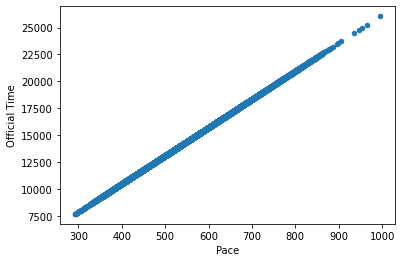

In [63]:
# 'Pace' should be perfectly correlated with 'Official Time', so we'll remove it from our X data (but keep it for analysis)
# Plot a scatter plot of 'Pace' against 'Official Time'
df.plot(kind='scatter', x='Pace', y='Official Time')

In [64]:
# Create a training set 'X' with every column except 'Pace'
X = df.drop('Pace', axis=1)

# Alternatively, select all the columns to keep
#X = df[['Age', 'M/F','5K','10K','15K','20K','25K','30K','35K','40K','Half','Official Time']]

In [65]:
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[1.84615385e-01, 1.00000000e+00, 2.84399833e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.69230769e-01, 1.00000000e+00, 2.80217482e-02, ...,
        0.00000000e+00, 5.79072326e-05, 1.08843537e-04],
       [2.46153846e-01, 1.00000000e+00, 2.96946884e-02, ...,
        0.00000000e+00, 0.00000000e+00, 5.44217687e-04],
       ...,
       [5.07692308e-01, 1.00000000e+00, 6.03094939e-01, ...,
        9.84187267e-01, 9.51705368e-01, 9.42965986e-01],
       [4.30769231e-01, 0.00000000e+00, 6.15641991e-01, ...,
        9.93509184e-01, 9.56453761e-01, 9.56734694e-01],
       [3.69230769e-01, 1.00000000e+00, 3.26641573e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

# ==========================================

### 1.05 Instructor Do: Chicago Marathon K-Means (0:10)

In [63]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [64]:
df = pd.read_csv('05-Ins_KMeans/Resources/chicago_marathon_2018.csv')
df.head()

place_overall  place_gender  bib                          name division  \
0              1             1    1               Farah, Mo (GBR)    35-39   
1              2             2    2  Bayih, Mosinet Geremew (ETH)    25-29   
2              3             3    3           Osako, Suguru (JPN)    25-29   
3              4             4    4       Kipkemoi, Kenneth (KEN)    30-34   
4              5             5    5             Rupp, Galen (USA)    30-34   

      half   finish  
0  1:03:06  2:05:11  
1  1:03:04  2:05:24  
2  1:03:04  2:05:50  
3  1:03:04  2:05:57  
4  1:03:04  2:06:21

In [65]:
df['country'] = df['name'].str.extract('\((.{3})\)')
df = df.dropna()
df.head()

place_overall  place_gender  bib                          name division  \
0              1             1    1               Farah, Mo (GBR)    35-39   
1              2             2    2  Bayih, Mosinet Geremew (ETH)    25-29   
2              3             3    3           Osako, Suguru (JPN)    25-29   
3              4             4    4       Kipkemoi, Kenneth (KEN)    30-34   
4              5             5    5             Rupp, Galen (USA)    30-34   

      half   finish country  
0  1:03:06  2:05:11     GBR  
1  1:03:04  2:05:24     ETH  
2  1:03:04  2:05:50     JPN  
3  1:03:04  2:05:57     KEN  
4  1:03:04  2:06:21     USA

In [66]:
df['country'].value_counts().head(20)

USA    13822
MEX     1221
GBR      911
CHN      812
CAN      729
BRA      627
GER      356
ESP      344
ITA      342
FRA      315
IND      275
JPN      235
CRC      222
HKG      218
COL      192
AUS      184
IRL      177
ARG      170
TWN      170
NED      157
Name: country, dtype: int64

In [67]:
df['country'] = df['country'].apply(lambda x: x if x in ('USA', 'MEX', 'GBR', 'CHN', 'CAN') else 'Other')

In [68]:
df[['half','finish']] = df[['half','finish']].apply(pd.to_timedelta).apply(lambda x: x.dt.total_seconds())

In [70]:
X = df[['half','finish', 'division', 'country']].copy()
X['division'] = LabelEncoder().fit_transform(X['division'])
X['country'] = LabelEncoder().fit_transform(X['country'])
X = X.dropna()
X.head()

half  finish  division  country
0  3786.0  7511.0         4        2
1  3784.0  7524.0         2        4
2  3784.0  7550.0         2        4
3  3784.0  7557.0         3        4
4  3784.0  7581.0         3        5

In [71]:
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[2.19170076e-04, 0.00000000e+00, 3.07692308e-01, 4.00000000e-01],
       [7.30566920e-05, 5.18237991e-04, 1.53846154e-01, 8.00000000e-01],
       [7.30566920e-05, 1.55471397e-03, 1.53846154e-01, 8.00000000e-01],
       ...,
       [6.76870251e-01, 9.45026909e-01, 7.69230769e-01, 1.00000000e+00],
       [6.60432496e-01, 9.49212677e-01, 6.92307692e-01, 1.00000000e+00],
       [6.79208065e-01, 1.00000000e+00, 5.38461538e-01, 1.00000000e+00]])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

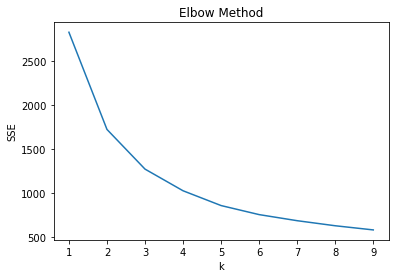

In [75]:
sse = {}
K = list(range(1, 10))
for k in list(range(1, 10)):
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [76]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

In [77]:
# Calculate predicted values.
y_pred = model.predict(X_scaled)

In [78]:
# Add prediected values onto the original dataframe
df_y = pd.DataFrame(y_pred, columns=['Cluster'])
combined = df.join(df_y, how='inner')
combined.head()

place_overall  place_gender  bib                          name division  \
0              1             1    1               Farah, Mo (GBR)    35-39   
1              2             2    2  Bayih, Mosinet Geremew (ETH)    25-29   
2              3             3    3           Osako, Suguru (JPN)    25-29   
3              4             4    4       Kipkemoi, Kenneth (KEN)    30-34   
4              5             5    5             Rupp, Galen (USA)    30-34   

     half  finish country  Cluster  
0  3786.0  7511.0     GBR        2  
1  3784.0  7524.0   Other        0  
2  3784.0  7550.0   Other        0  
3  3784.0  7557.0   Other        0  
4  3784.0  7581.0     USA        0

<AxesSubplot:title={'center':'finish'}, xlabel='[Cluster]'>

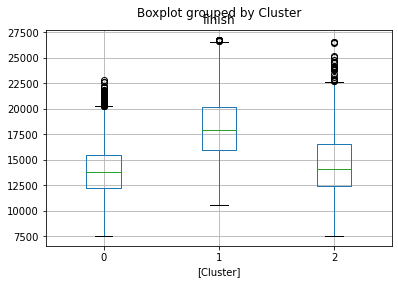

In [79]:
# Plot boxplots of the official time distributions by cluster
combined.boxplot(['finish'], by=['Cluster'])

In [80]:
# Plot median finish times by division for each cluster
combined[combined['Cluster'] == 0].groupby('division').median()['finish'].plot()
combined[combined['Cluster'] == 1].groupby('division').median()['finish'].plot()
combined[combined['Cluster'] == 2].groupby('division').median()['finish'].plot()

<AxesSubplot:xlabel='division'>

# ==========================================

### 1.06 Students Do: K-Means (0:15)

# K-means

* In this activity, you will perform a k-means clustering on the preprocessed Boston Marathon Finishers dataset to determine data-driven age groups.

## Instructions

* Use the provided code to test k-means models from `k = 1` to `k = 9` and print out the inertia of each model. Use the elbow method to determine an appropriate value for `k`

* Create a k-means model with 3 clusters, calculate predicted clusters, and attach predictions to the original dataframe.

* Visualize the breakdown of official times by cluster using boxplots.

* Print out summary statistics of ages, grouped by `M/F` and `Cluster`.

* Create a function that takes in gender and age and assigns an age group based on the following break points for each gender:
  * The lowest 1st quartile
  * Each median
  * The highest 3rd quartile

* Apply the custom age group to the original data frame and save it to the column 'Age Group'.

---

In [81]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Import the KMeans module and matplotlib
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [82]:
df = pd.read_csv('06-Stu_KMeans/Resources/marathon_results_2019.csv')
df.head()

Bib               Name  Age M/F      City State Country Citizen Unnamed: 8  \
0   2  Cherono, Lawrence   30   M   Eldoret   NaN     KEN     NaN        NaN   
1   6     Desisa, Lelisa   29   M      Ambo   NaN     ETH     NaN        NaN   
2   7  Kipkemoi, Kenneth   34   M   Eldoret   NaN     KEN     NaN        NaN   
3   8      Kandie, Felix   32   M      Iten   NaN     KEN     NaN        NaN   
4  11    Kirui, Geoffrey   26   M  Keringet   NaN     KEN     NaN        NaN   

        5K  ...      25K      30K      35K      40K     Pace Proj Time  \
0  0:15:11  ...  1:16:23  1:32:01  1:47:16  2:01:45  0:04:53       NaN   
1  0:15:10  ...  1:16:24  1:32:01  1:47:16  2:01:46  0:04:53       NaN   
2  0:15:14  ...  1:16:24  1:32:01  1:47:16  2:01:45  0:04:54       NaN   
3  0:15:14  ...  1:16:24  1:32:01  1:47:16  2:02:08  0:04:55       NaN   
4  0:15:12  ...  1:16:23  1:32:01  1:47:16  2:01:57  0:04:56       NaN   

  Official Time Overall Gender Division  
0       2:07:57       1      1        1  
1       2:07:59       2      2        2  
2       2:08:07       3      3        3  
3       2:08:54       4      4        4  
4       2:08:55       5      5        5  

[5 rows x 24 columns]

In [83]:
# Subset the dataframe to only the columns "Age", "M/F", split times (i.e. "5K, 10K", etc.), "Pace", and "Official Time". 
df = df[['Age', 'M/F', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']]
df.head()

Age M/F       5K      10K      15K      20K     Half      25K      30K  \
0   30   M  0:15:11  0:30:21  0:45:48  1:01:16  1:04:29  1:16:23  1:32:01   
1   29   M  0:15:10  0:30:22  0:45:46  1:01:16  1:04:30  1:16:24  1:32:01   
2   34   M  0:15:14  0:30:22  0:45:47  1:01:17  1:04:31  1:16:24  1:32:01   
3   32   M  0:15:14  0:30:24  0:45:47  1:01:16  1:04:31  1:16:24  1:32:01   
4   26   M  0:15:12  0:30:21  0:45:46  1:01:15  1:04:28  1:16:23  1:32:01   

       35K      40K     Pace Official Time  
0  1:47:16  2:01:45  0:04:53       2:07:57  
1  1:47:16  2:01:46  0:04:53       2:07:59  
2  1:47:16  2:01:45  0:04:54       2:08:07  
3  1:47:16  2:02:08  0:04:55       2:08:54  
4  1:47:16  2:01:57  0:04:56       2:08:55

In [84]:
time_columns = ['5K', '10K', '15K', '20K', 'Half','25K', '30K', '35K', '40K', 'Pace', 'Official Time']
for x in time_columns:
    print(x)
    df[x]=df[x].replace("-", "0")

5K
10K
15K
20K
Half
25K
30K
35K
40K
Pace
Official Time


In [85]:
# Convert the split times, "Pace", and "Official Time" to timedeltas using apply() and pandas.to_timedelta()
time_columns = ['5K', '10K', '15K', '20K', 'Half','25K', '30K', '35K', '40K', 'Pace', 'Official Time']
df[time_columns] = df[time_columns].apply(pd.to_timedelta)
df.head()

Age M/F              5K             10K             15K             20K  \
0   30   M 0 days 00:15:11 0 days 00:30:21 0 days 00:45:48 0 days 01:01:16   
1   29   M 0 days 00:15:10 0 days 00:30:22 0 days 00:45:46 0 days 01:01:16   
2   34   M 0 days 00:15:14 0 days 00:30:22 0 days 00:45:47 0 days 01:01:17   
3   32   M 0 days 00:15:14 0 days 00:30:24 0 days 00:45:47 0 days 01:01:16   
4   26   M 0 days 00:15:12 0 days 00:30:21 0 days 00:45:46 0 days 01:01:15   

             Half             25K             30K             35K  \
0 0 days 01:04:29 0 days 01:16:23 0 days 01:32:01 0 days 01:47:16   
1 0 days 01:04:30 0 days 01:16:24 0 days 01:32:01 0 days 01:47:16   
2 0 days 01:04:31 0 days 01:16:24 0 days 01:32:01 0 days 01:47:16   
3 0 days 01:04:31 0 days 01:16:24 0 days 01:32:01 0 days 01:47:16   
4 0 days 01:04:28 0 days 01:16:23 0 days 01:32:01 0 days 01:47:16   

              40K            Pace   Official Time  
0 0 days 02:01:45 0 days 00:04:53 0 days 02:07:57  
1 0 days 02:01:46 0 days 00:04:53 0 days 02:07:59  
2 0 days 02:01:45 0 days 00:04:54 0 days 02:08:07  
3 0 days 02:02:08 0 days 00:04:55 0 days 02:08:54  
4 0 days 02:01:57 0 days 00:04:56 0 days 02:08:55

In [86]:
# Convert timedeltas to seconds by applying the lambda function lambda x: x.dt.total_seconds()
df[time_columns] = df[time_columns].apply(lambda x: x.dt.total_seconds())
df.head()

Age M/F     5K     10K     15K     20K    Half     25K     30K     35K  \
0   30   M  911.0  1821.0  2748.0  3676.0  3869.0  4583.0  5521.0  6436.0   
1   29   M  910.0  1822.0  2746.0  3676.0  3870.0  4584.0  5521.0  6436.0   
2   34   M  914.0  1822.0  2747.0  3677.0  3871.0  4584.0  5521.0  6436.0   
3   32   M  914.0  1824.0  2747.0  3676.0  3871.0  4584.0  5521.0  6436.0   
4   26   M  912.0  1821.0  2746.0  3675.0  3868.0  4583.0  5521.0  6436.0   

      40K   Pace  Official Time  
0  7305.0  293.0         7677.0  
1  7306.0  293.0         7679.0  
2  7305.0  294.0         7687.0  
3  7328.0  295.0         7734.0  
4  7317.0  296.0         7735.0

In [87]:
# Subset df to only rows where the split values are non-zero
df = df[
    (df['5K'] != 0) & 
    (df['10K'] != 0) & 
    (df['15K'] != 0) & 
    (df['20K'] != 0) & 
    (df['Half'] != 0) & 
    (df['25K'] != 0) & 
    (df['30K'] != 0) & 
    (df['35K'] != 0) & 
    (df['40K'] != 0)
]

# A more concise method
#df[~(df == 0).any(axis=1)]

df.head()

Age M/F     5K     10K     15K     20K    Half     25K     30K     35K  \
0   30   M  911.0  1821.0  2748.0  3676.0  3869.0  4583.0  5521.0  6436.0   
1   29   M  910.0  1822.0  2746.0  3676.0  3870.0  4584.0  5521.0  6436.0   
2   34   M  914.0  1822.0  2747.0  3677.0  3871.0  4584.0  5521.0  6436.0   
3   32   M  914.0  1824.0  2747.0  3676.0  3871.0  4584.0  5521.0  6436.0   
4   26   M  912.0  1821.0  2746.0  3675.0  3868.0  4583.0  5521.0  6436.0   

      40K   Pace  Official Time  
0  7305.0  293.0         7677.0  
1  7306.0  293.0         7679.0  
2  7305.0  294.0         7687.0  
3  7328.0  295.0         7734.0  
4  7317.0  296.0         7735.0

In [88]:
# Use LabelEncoder to convert 'M/F' into integer labels
df['M/F'] = LabelEncoder().fit_transform(df['M/F'])

# Equivalently, the encoder can be created and applied in two steps
# encoder = LabelEncoder().fit(df['M/F'])
# df['M/F'] = encoder.transform(df['M/F'])

df.head()

Age  M/F     5K     10K     15K     20K    Half     25K     30K     35K  \
0   30    1  911.0  1821.0  2748.0  3676.0  3869.0  4583.0  5521.0  6436.0   
1   29    1  910.0  1822.0  2746.0  3676.0  3870.0  4584.0  5521.0  6436.0   
2   34    1  914.0  1822.0  2747.0  3677.0  3871.0  4584.0  5521.0  6436.0   
3   32    1  914.0  1824.0  2747.0  3676.0  3871.0  4584.0  5521.0  6436.0   
4   26    1  912.0  1821.0  2746.0  3675.0  3868.0  4583.0  5521.0  6436.0   

      40K   Pace  Official Time  
0  7305.0  293.0         7677.0  
1  7306.0  293.0         7679.0  
2  7305.0  294.0         7687.0  
3  7328.0  295.0         7734.0  
4  7317.0  296.0         7735.0

In [89]:
# Convert 'Age' to a numeric value
df['Age'] = pd.to_numeric(df['Age'])

<AxesSubplot:xlabel='Pace', ylabel='Official Time'>

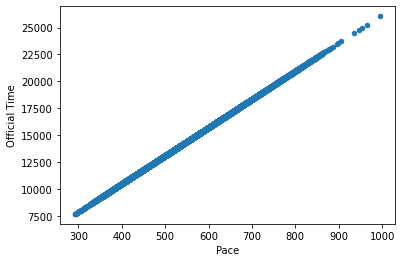

In [90]:
# 'Pace' should be perfectly correlated with 'Official Time', so we'll remove it from our X data (but keep it for analysis)
# Plot a scatter plot of 'Pace' against 'Official Time'
df.plot(kind='scatter', x='Pace', y='Official Time')

In [91]:
# Create a training set 'X' with every column except 'Pace'
X = df.drop('Pace', axis=1)

# Alternatively, select all the columns to keep
#X = df[['Age', 'M/F','5K','10K','15K','20K','25K','30K','35K','40K','Half','Official Time']]


In [92]:
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[1.84615385e-01, 1.00000000e+00, 2.84399833e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.69230769e-01, 1.00000000e+00, 2.80217482e-02, ...,
        0.00000000e+00, 5.79072326e-05, 1.08843537e-04],
       [2.46153846e-01, 1.00000000e+00, 2.96946884e-02, ...,
        0.00000000e+00, 0.00000000e+00, 5.44217687e-04],
       ...,
       [5.07692308e-01, 1.00000000e+00, 6.03094939e-01, ...,
        9.84187267e-01, 9.51705368e-01, 9.42965986e-01],
       [4.30769231e-01, 0.00000000e+00, 6.15641991e-01, ...,
        9.93509184e-01, 9.56453761e-01, 9.56734694e-01],
       [3.69230769e-01, 1.00000000e+00, 3.26641573e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [93]:
sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [94]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

In [95]:
# Calculate predicted values.
y_pred = model.predict(X_scaled)

In [96]:
# Add predicted values onto the original dataframe
df_y = pd.DataFrame(y_pred, columns=['Cluster'])
combined = df.join(df_y, how='inner')
combined.head()

Age  M/F     5K     10K     15K     20K    Half     25K     30K     35K  \
0   30    1  911.0  1821.0  2748.0  3676.0  3869.0  4583.0  5521.0  6436.0   
1   29    1  910.0  1822.0  2746.0  3676.0  3870.0  4584.0  5521.0  6436.0   
2   34    1  914.0  1822.0  2747.0  3677.0  3871.0  4584.0  5521.0  6436.0   
3   32    1  914.0  1824.0  2747.0  3676.0  3871.0  4584.0  5521.0  6436.0   
4   26    1  912.0  1821.0  2746.0  3675.0  3868.0  4583.0  5521.0  6436.0   

      40K   Pace  Official Time  Cluster  
0  7305.0  293.0         7677.0        0  
1  7306.0  293.0         7679.0        0  
2  7305.0  294.0         7687.0        0  
3  7328.0  295.0         7734.0        0  
4  7317.0  296.0         7735.0        0

<AxesSubplot:title={'center':'Official Time'}, xlabel='[Cluster]'>

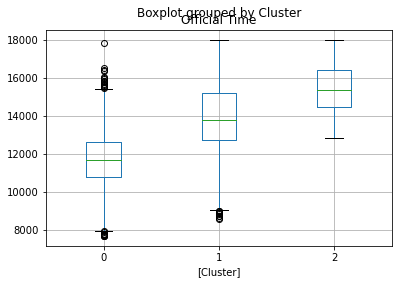

In [97]:
# Plot boxplots of the official time distributions by cluster
combined.boxplot(['Official Time'], by=['Cluster'])

In [98]:
# Print out summary statistics of ages by M/F and Cluster
combined.groupby(['M/F','Cluster']).describe()['Age']

count       mean        std   min   25%   50%   75%   max
M/F Cluster                                                            
0   0        2517.0  36.437028   8.746684  18.0  29.0  36.0  42.0  66.0
    1        5054.0  40.922438  10.638675  18.0  32.0  41.0  48.0  75.0
    2        2069.0  43.509908  11.197045  18.0  35.0  45.0  51.0  72.0
1   0        6044.0  40.346128   9.852292  18.0  33.0  40.0  48.0  80.0
    1        4813.0  47.259713  11.285711  18.0  39.0  48.0  56.0  82.0
    2        1532.0  50.374021  12.329217  18.0  42.0  53.0  60.0  80.0

In [99]:
# Create a function that takes in gender and age and assigns an age group based on the following break points for each gender:
# * The lowest 1st quartile
# * Each median
# * The highest 3rd quartile
def age_group(gender, age):
    if gender == 0:
        if age < 29:
            return 0
        elif age < 36:
            return 1
        elif age < 41:
            return 2
        elif age < 45:
            return 3
        elif age < 51:
            return 4
        else:
            return 5
    if gender == 1:
        if age < 33:
            return 0
        elif age < 40:
            return 1
        elif age < 48:
            return 2
        elif age < 53:
            return 3
        elif age < 60:
            return 4
        else:
            return 5

In [100]:
# Apply the custom age group to the original data frame and save it to the column 'Age Group'
df['Age Group'] = df.apply(lambda row: age_group(row['M/F'], row['Age']), axis=1)
df.head()

Age  M/F     5K     10K     15K     20K    Half     25K     30K     35K  \
0   30    1  911.0  1821.0  2748.0  3676.0  3869.0  4583.0  5521.0  6436.0   
1   29    1  910.0  1822.0  2746.0  3676.0  3870.0  4584.0  5521.0  6436.0   
2   34    1  914.0  1822.0  2747.0  3677.0  3871.0  4584.0  5521.0  6436.0   
3   32    1  914.0  1824.0  2747.0  3676.0  3871.0  4584.0  5521.0  6436.0   
4   26    1  912.0  1821.0  2746.0  3675.0  3868.0  4583.0  5521.0  6436.0   

      40K   Pace  Official Time  Age Group  
0  7305.0  293.0         7677.0          0  
1  7306.0  293.0         7679.0          0  
2  7305.0  294.0         7687.0          1  
3  7328.0  295.0         7734.0          0  
4  7317.0  296.0         7735.0          0

# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "18-Unsupervised-Learning - Introduction to Unsupervised Machine Learning"
objectives = [
    "Understand how unsupervised learning compares to supervised learning",
    "Prepare and process data for unsupervised learning",
    "Apply K-means clustering",
    "Use the elbow curve to determine optimal cluster number",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))